<a href="https://colab.research.google.com/github/HinaNitano/EU_M_Math/blob/main/Chap03_Cm_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import requests, zipfile
from io import StringIO
import io

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

In [ ]:
# データがあるURLの指定
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

# データをURLから取得する
r = requests.get(url, stream=True)

# Zipfileを読み込み、展開する
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
ls

sample_data/  student-mat.csv  student-merge.R  student-por.csv  student.txt


In [ ]:
# データの読み込み
student_data_math = pd.read_csv('student-mat.csv', sep=';')

In [ ]:
# 男女別にする
male_data_math = student_data_math[student_data_math['sex'] == 'M']
female_data_math = student_data_math[student_data_math['sex'] == 'F']

# 一期目の数学のデータを昇順にソートする
sorted_G1_male_data_math = male_data_math['G1'].sort_values()
sorted_G1_female_data_math = female_data_math['G1'].sort_values()

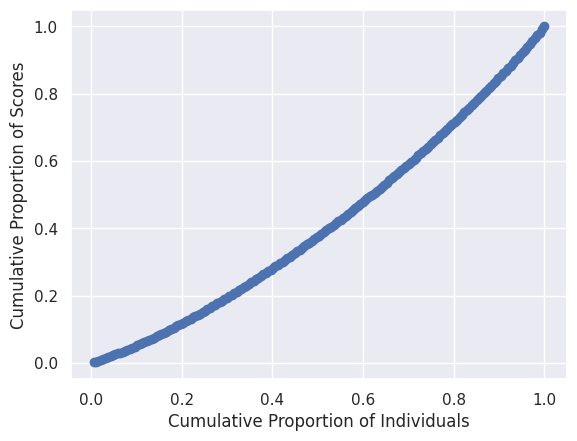

In [ ]:
# 男性の人数の累積比率
total_male = len(sorted_G1_male_data_math)
ratio_male = []
for i in range(total_male):
  ratio_male.append((i + 1) / total_male)

# 男性の一期目の成績値の累積比率
ratio_G1_male = sorted_G1_male_data_math.cumsum()/sorted_G1_male_data_math.sum()

# グラフの描画 (男性)
plt.plot(ratio_male,ratio_G1_male, marker='o')
plt.xlabel("Cumulative Proportion of Individuals")
plt.ylabel("Cumulative Proportion of Scores")
plt.grid(True)
plt.show()

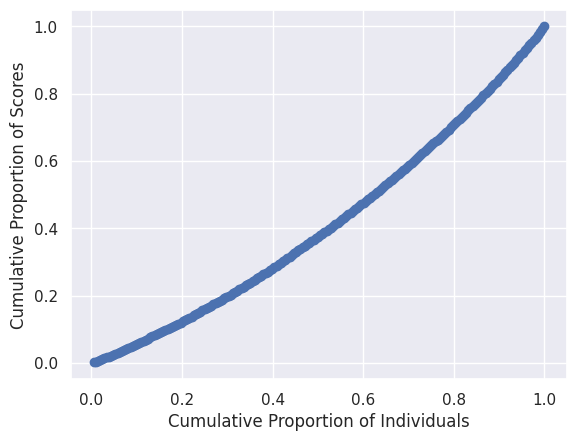

In [ ]:
# 女性の人数の累積比率
total_female = len(sorted_G1_female_data_math)
ratio_female = []
for i in range(total_female):
  ratio_female.append((i + 1) / total_female)

# 女性の一期目の成績値の累積比率
ratio_G1_female = sorted_G1_female_data_math.cumsum()/sorted_G1_female_data_math.sum()

# グラフの描画 (女性)
plt.plot(ratio_female,ratio_G1_female, marker='o')
plt.xlabel("Cumulative Proportion of Individuals")
plt.ylabel("Cumulative Proportion of Scores")
plt.grid(True)
plt.show()

In [ ]:
# 男性のデータのジニ係数
def gini_coefficient_male(sorted_G1_male_data_math):
    # データをソート
    sorted_data_male = sorted(sorted_G1_male_data_math)
    n_male = len(sorted_G1_male_data_math)

    # 累積相対頻度の計算
    cumulative_freq_male = [sum(sorted_data_male[:i+1]) for i in range(n_male)]

    # ジニ係数の計算
    numerator_male = 0
    for i in range(n_male):
        numerator_male += (i + 1) * cumulative_freq_male[i]
    denominator_male = n_male * sum(sorted_data_male)

    # ジニ係数の算出
    gini_coef_male =(n_male + 1) / n_male - (2 * numerator_male) / (n_male * denominator_male)
    return gini_coef_male

# ジニ係数の計算
gini_male = gini_coefficient_male(sorted_G1_male_data_math)
print('ジニ係数:', gini_male)

ジニ係数: 0.4199883706521014


In [ ]:
# 女性のデータのジニ係数
def gini_coefficient_female(sorted_G1_female_data_math):
    # データをソート
    sorted_data_female = sorted(sorted_G1_female_data_math)
    n_female = len(sorted_G1_female_data_math)

    # 累積相対頻度の計算
    cumulative_freq_female = [sum(sorted_data_female[:i+1]) for i in range(n_female)]

    # ジニ係数の計算
    numerator_female = 0
    for i in range(n_female):
        numerator_female += (i + 1) * cumulative_freq_female[i]
    denominator_female = n_female * sum(sorted_data_female)

    # ジニ係数の算出
    gini_coef_female =(n_female + 1) / n_female - (2 * numerator_female) / (n_female * denominator_female)
    return gini_coef_female

# ジニ係数の計算
gini_female = gini_coefficient_female(sorted_G1_female_data_math)
print('ジニ係数:', gini_female)

ジニ係数: 0.422064012940606
